In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 

df = pd.read_csv("telemonitoring_parkinsons_updrs.data.csv")


In [5]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
data = pd.read_csv("/kaggle/input/parkinsons-disease-detection/parkinsons.data", sep=',', index_col='name') # assign index column to name 
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/parkinsons-disease-detection/parkinsons.data'

In [ ]:
import kagglehub
naveenkumar20bps1137_parkinsons_disease_detection_path = kagglehub.dataset_download('naveenkumar20bps1137/parkinsons-disease-detection')

print('Data source import complete.')



100%|██████████| 309k/309k [00:00<00:00, 582kB/s]

Extracting files...
Data source import complete.


In [9]:
print(naveenkumar20bps1137_parkinsons_disease_detection_path)


C:\Users\USER\.cache\kagglehub\datasets\naveenkumar20bps1137\parkinsons-disease-detection\versions\1


In [10]:
import os

# List all files in the dataset directory
files = os.listdir(naveenkumar20bps1137_parkinsons_disease_detection_path)
print("Files in the dataset:", files)


Files in the dataset: ['parkinsons.data', 'parkinsons.names', 'telemonitoring']


In [13]:
import pandas as pd

# Path to the file
data_path = r"C:\Users\USER\.cache\kagglehub\datasets\naveenkumar20bps1137\parkinsons-disease-detection\versions\1\parkinsons.data"

# Load the data, assuming it's CSV-like
df = pd.read_csv(data_path, sep=',')  # Adjust `sep` if needed (e.g., `'\t'` for tab-delimited)

# Display the first few rows
print(df.head())

print(df.shape)


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [26]:
df = df.drop(columns=['name'])

In [27]:
features = df.drop(columns=['status'])
target = df['status']

In [28]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features) 
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)  # Keep column names
print(normalized_features_df.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1

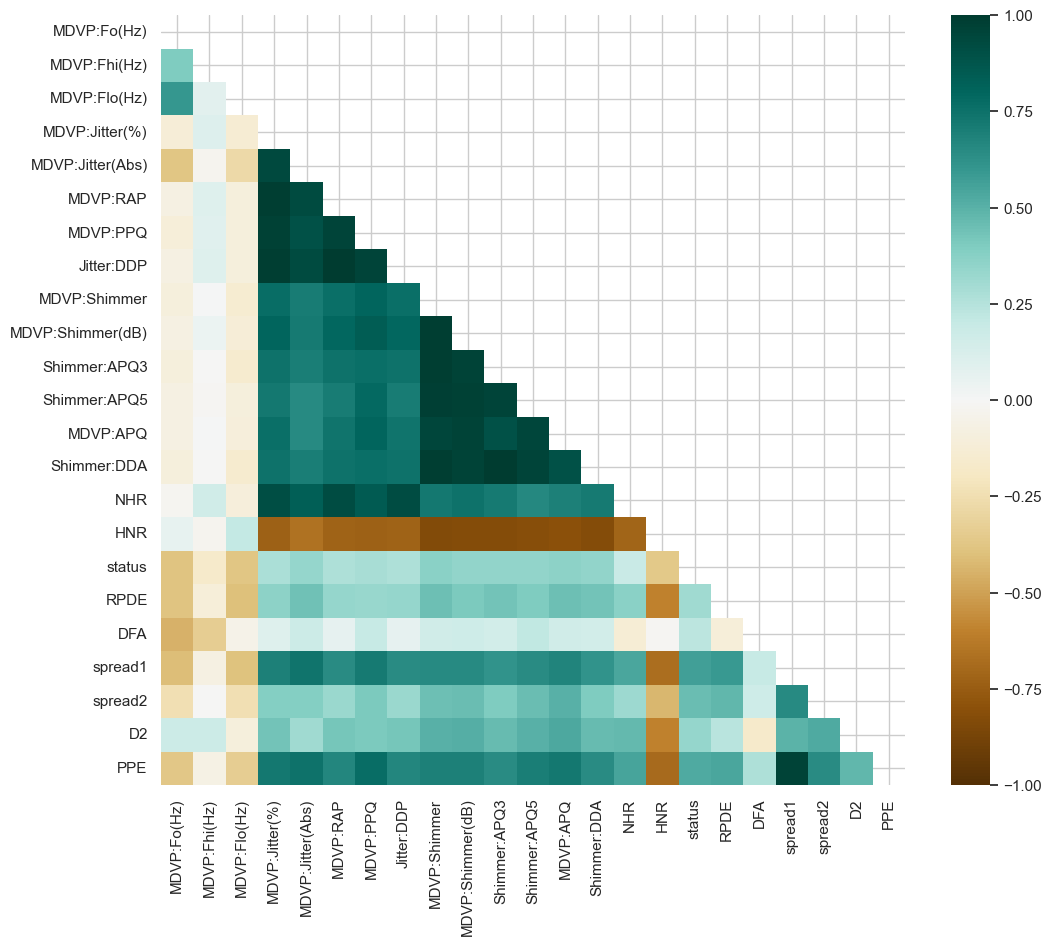

In [30]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))  # Replace np.bool with bool
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', mask=mask)
plt.show()


In [ ]:
import pandas as pd

# Path to the file
data_path = r"C:\Users\USER\.cache\kagglehub\datasets\naveenkumar20bps1137\parkinsons-disease-detection\versions\1\parkinsons.data"

# Load the data, assuming it's CSV-like
df = pd.read_csv(data_path, sep=',')  # Adjust `sep` if needed (e.g., `'\t'` for tab-delimited)

# Display the first few rows
print(df.head())

print(df.shape)


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654